In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
def read_and_plot_seqs_identity():
    plt.figure(figsize=(9, 7))
    df = pd.read_excel(r"C:\Users\homework\identitity.xls")
    datas = []
    for row in df.itertuples():
        data = []
        for i in range(1, 108):
            data.append(float(row[i]))
        datas.append(data)
    # print(datas)
    datas = Bubble_Sort(datas)
    plt.imshow(datas, cmap=plt.cm.Reds, origin='lower', aspect='auto')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Sequence index", fontsize=22, weight="bold")
    plt.ylabel("Sequence index", fontsize=22, weight="bold")
    clb = plt.colorbar()
    clb.ax.tick_params(labelsize=18)
    clb.set_label('Identity (%)', fontsize=22, fontweight="bold")
    plt.savefig("C:/Users/17351/Desktop/protein_fram/G11/Figs/fig8/ensemble_seqs.png", format='png', dpi=600)
    plt.show()

def read_and_plot_structure_identity(save_path):
    plt.figure(figsize=(9, 7))
    df = pd.read_excel(r"C:\Users\homework\GH10_ensemble.xls", sheet_name="TY1_RMSD_fitter")
    # df = pd.read_csv(r"C:\Users\17351\Desktop\protein_fram\G11\Figs\fig8\GH11_export.txt")
    pdb_ids = df['pid']
    rmsd_values = []
    for pdb_id in pdb_ids:
        ensemble = loadEnsemble(save_path + pdb_id + "ensemble" + ".ens.npz")
        rmsd = ensemble.getRMSDs()
        # print(rmsd)
        rmsd_values.append(rmsd)

    rmsd_values = Bubble_Sort(rmsd_values)
    # print("sort ", rmsd_values)
    plt.imshow(rmsd_values, cmap=plt.cm.Blues, origin='lower', aspect='auto')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Structure index", fontsize=22, weight="bold")
    plt.ylabel("Structure index", fontsize=22, weight="bold")
    clb = plt.colorbar()
    clb.ax.tick_params(labelsize=18)
    clb.set_label('RMSD (Å)', fontsize=22, fontweight="bold")
    plt.savefig("C:/Users/17351/Desktop/protein_fram/G11/Figs/fig8/ensemble_structure.png", format='png', dpi=600)
    plt.show()

def Bubble_Sort(datas):
    l = len(datas)
    index = np.array(np.arange(0, 107))
    for i in range(1, l):
        for j in range(l - i):
            if datas[j][0] > datas[j + 1][0]:
                tmp = datas[j + 1]
                datas[j + 1] = datas[j]
                datas[j] = tmp

                tmp = index[j + 1]
                index[j + 1] = index[j]
                index[j] = tmp
    print(index)
    sored_data = np.zeros((107, 107))
    for i in range(107):
        for j in range(107):
            sored_data[j][i] = datas[j][index[i]]
    return sored_data

[106  66  69  67  68  29  51  52  53  54  55  84  39  35  36  64 105  62
  65  82  83  63 100  44  85  11  12  13  14  15  23  40  45  46  47  48
  49  50  71  34  37  41  42  43  58  59  26  30  31   8   9  10  32  33
  60  61  86  87  88  89  90  91 103 104 101 102  25  70  81  27  76  80
  99  95  98  73  94  97  74  78  56  96  75  79  77  93  72  92  57  28
  16  17  18  19  20  24  38  21  22   0   1   2   3   4   5   6   7]


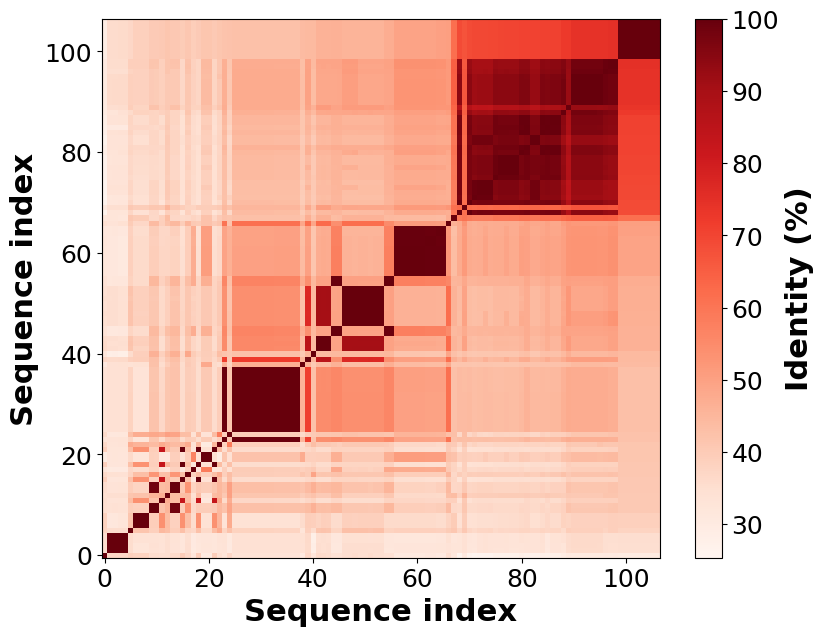

In [5]:
read_and_plot_seqs_identity()